In [97]:
import pandas as pd 
import numpy as  np
import seaborn  as sns  
import matplotlib.pyplot as plt


In [98]:
dds=pd.read_csv('Automobile price data _Raw_.csv')
print(dds.info())
print(dds.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [99]:
z=dds.copy()

In [100]:
data = z[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','price']] 

In [101]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
#import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor,  DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier, AdaBoostClassifier,AdaBoostRegressor, BaggingClassifier, BaggingRegressor, ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, cross_validate, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LogisticRegression, LinearRegression, SGDClassifier, SGDRegressor, Perceptron, PassiveAggressiveClassifier, PassiveAggressiveRegressor
# import knn 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
#cross_validation 
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold, GridSearchCV, RandomizedSearchCV, learning_curve
#import ensemble
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier,AdaBoostRegressor, BaggingClassifier, BaggingRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#import repeated cross validation
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold


lm =LinearRegression()
lr=LogisticRegression()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()
bgr=BaggingRegressor()
etr=ExtraTreesRegressor()

In [102]:
#linearity test on Z
print(data.shape)
print(data.head())


(205, 5)
  horsepower  curb-weight  engine-size  highway-mpg  price
0        111         2548          130           27  13495
1        111         2548          130           27  16500
2        154         2823          152           26  16500
3        102         2337          109           30  13950
4        115         2824          136           22  17450


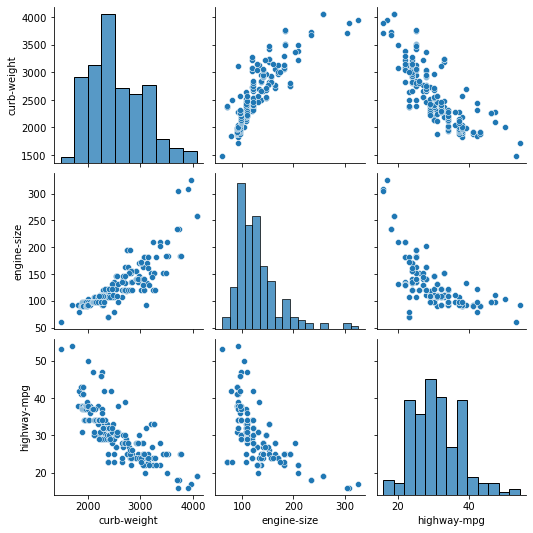

In [103]:
sns.pairplot(data)

In [104]:
data.isna().sum()

horsepower     0
curb-weight    0
engine-size    0
highway-mpg    0
price          0
dtype: int64

In [105]:
missing_data = data.isnull()
missing_data.head(5)

,horsepower,curb-weight,engine-size,highway-mpg,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [106]:
for column in missing_data.columns:
    print(column)
    print (missing_data[column].value_counts())
    print("")  

horsepower
False    205
Name: horsepower, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

highway-mpg
False    205
Name: highway-mpg, dtype: int64

price
False    205
Name: price, dtype: int64



In [107]:
data['horsepower'].str.isnumeric().value_counts()

True     203
False      2
Name: horsepower, dtype: int64

In [108]:
horsepower=data['horsepower'].loc[data['horsepower']  != "?"]
hpmean=horsepower.astype(str).astype(int).mean()
data['horsepower']=data['horsepower'].replace("?",hpmean).astype(int)

C:\Users\suyog\AppData\Local\Temp/ipykernel_6632/3129749722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['horsepower']=data['horsepower'].replace("?",hpmean).astype(int)


In [109]:
data['price'].loc[data['price'].str.isnumeric()==False]#.value_counts()

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [110]:

data['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
104     2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64

In [111]:
price=data['price'].loc[data['price']!='?']
pmean=price.astype(str).astype(int).mean()
data['price']=data['price'].replace("?",pmean).astype(int)
data['price'].head()

C:\Users\suyog\AppData\Local\Temp/ipykernel_6632/595056191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price']=data['price'].replace("?",pmean).astype(int)


0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [112]:
data.head().isna().sum()

horsepower     0
curb-weight    0
engine-size    0
highway-mpg    0
price          0
dtype: int64

In [113]:
data['price'].value_counts()

13207    4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 187, dtype: int64

In [114]:
data.head()

,horsepower,curb-weight,engine-size,highway-mpg,price
0,111,2548,130,27,13495
1,111,2548,130,27,16500
2,154,2823,152,26,16500
3,102,2337,109,30,13950
4,115,2824,136,22,17450


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   horsepower   205 non-null    int32
 1   curb-weight  205 non-null    int64
 2   engine-size  205 non-null    int64
 3   highway-mpg  205 non-null    int64
 4   price        205 non-null    int32
dtypes: int32(2), int64(3)
memory usage: 6.5 KB


In [116]:
data['highway-mpg'].value_counts()

25    19
38    17
24    17
30    16
32    16
34    14
37    13
28    13
29    10
33     9
22     8
31     8
23     7
27     5
43     4
42     3
26     3
41     3
19     2
39     2
18     2
16     2
20     2
36     2
47     2
46     2
54     1
17     1
53     1
50     1
Name: highway-mpg, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

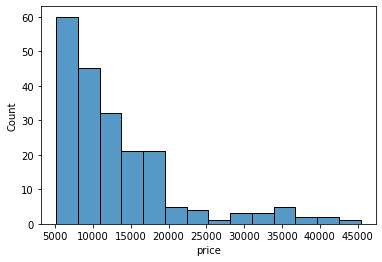

In [117]:
sns.histplot(data['price'])

In [118]:
data['price']=np.log(data['price'])

C:\Users\suyog\AppData\Local\Temp/ipykernel_6632/4109423935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price']=np.log(data['price'])


<AxesSubplot:xlabel='price', ylabel='Count'>

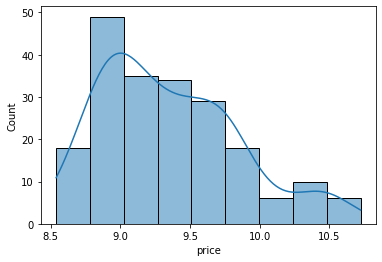

In [119]:
sns.histplot(data['price'],kde='kde')

In [120]:
data['price']=np.polynomial.Chebyshev(data['price'])

C:\Users\suyog\AppData\Local\Temp/ipykernel_6632/1812369705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price']=np.polynomial.Chebyshev(data['price'])


<AxesSubplot:xlabel='price', ylabel='Count'>

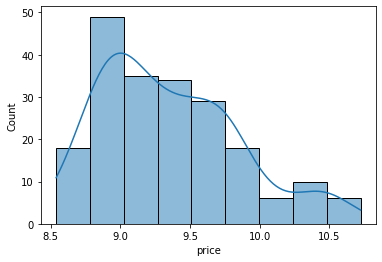

In [121]:
sns.histplot(data['price'],kde='kde')

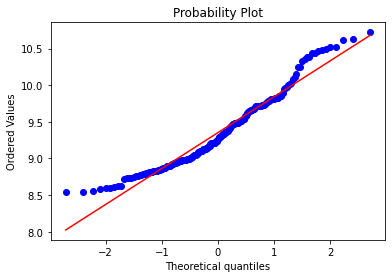

In [122]:
import scipy.stats as stats
import matplotlib
stats.probplot(data['price'], dist="norm", plot=matplotlib.pyplot)
plt.show()

In [123]:
# for other columns also

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

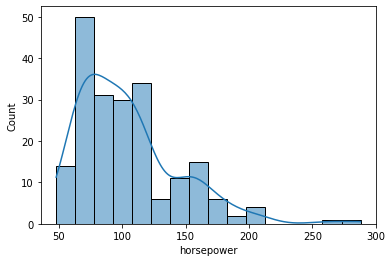

In [124]:
sns.histplot(data['horsepower'],kde='kde')

C:\Users\suyog\AppData\Local\Temp/ipykernel_6632/754229332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['horsepower'],param=stats.boxcox(data['horsepower'])


optimal lambda: -0.5883316524495755


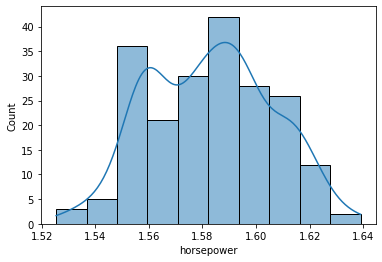

In [125]:
data['horsepower'],param=stats.boxcox(data['horsepower'])
sns.histplot(data['horsepower'],kde='kde')
print("optimal lambda:",param)


<AxesSubplot:xlabel='engine-size', ylabel='Count'>

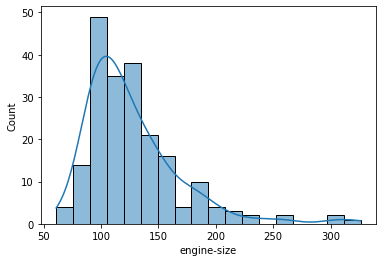

In [126]:
sns.histplot(data['engine-size'],kde='kde')

C:\Users\suyog\AppData\Local\Temp/ipykernel_6632/774710585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['engine-size'],param=stats.boxcox(data['engine-size'])


optimal lambda: -0.9617338982169858


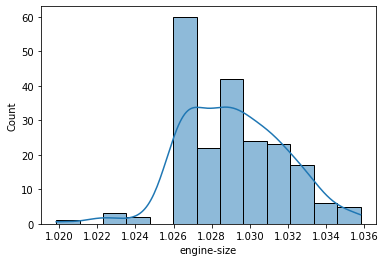

In [127]:
data['engine-size'],param=stats.boxcox(data['engine-size'])
sns.histplot(data['engine-size'],kde='kde')
print("optimal lambda:",param)

C:\Users\suyog\AppData\Local\Temp/ipykernel_6632/2837359863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['engine-size']=np.log(data['engine-size'])


<AxesSubplot:xlabel='engine-size', ylabel='Count'>

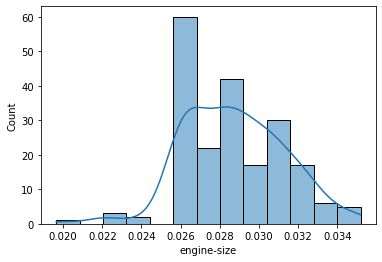

In [128]:
data['engine-size']=np.log(data['engine-size'])
sns.histplot(data['engine-size'],kde='kde')

<AxesSubplot:xlabel='highway-mpg', ylabel='Count'>

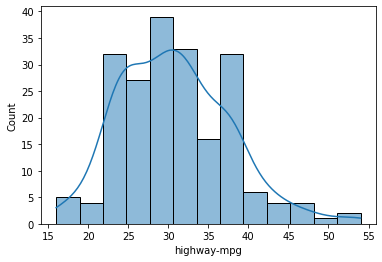

In [129]:
sns.histplot(data['highway-mpg'],kde='kde')

<AxesSubplot:xlabel='curb-weight', ylabel='Count'>

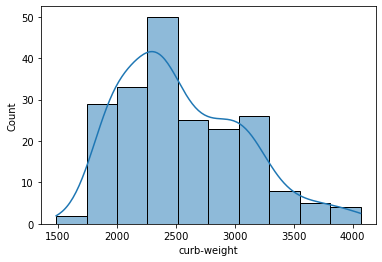

In [130]:
sns.histplot(data['curb-weight'],kde='kde')


In [131]:
data['curb-weight']=np.polynomial.Chebyshev(data['curb-weight'])

C:\Users\suyog\AppData\Local\Temp/ipykernel_6632/653391437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['curb-weight']=np.polynomial.Chebyshev(data['curb-weight'])


<AxesSubplot:xlabel='curb-weight', ylabel='Count'>

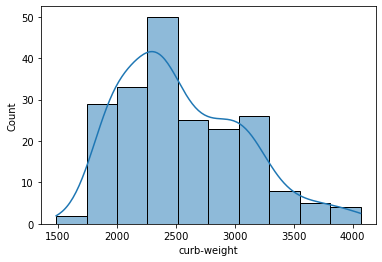

In [132]:
sns.histplot(data['curb-weight'],kde='kde')

In [133]:
# applyong probality tyseting for ensure col selscted is really good for model or not
# for contious col we are performing the simple regression and multi regression test

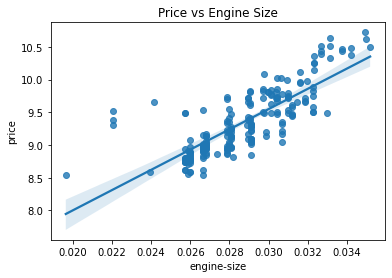

In [134]:
sns.regplot(x="engine-size",y="price",data=data)
#plt.ylim(0,)
plt.title("Price vs Engine Size")
plt.show()# +ve linear relationship- strong

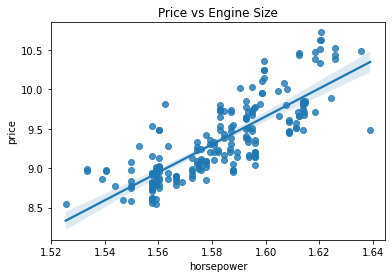

In [135]:
sns.regplot(x="horsepower",y="price",data=data)
plt.title("Price vs Engine Size")
plt.show()# +ve linear relationship- strong

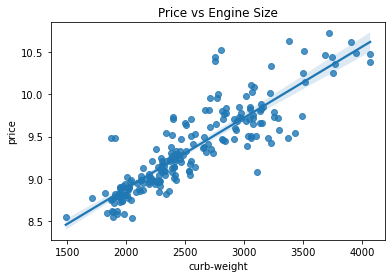

In [136]:
sns.regplot(x="curb-weight",y="price",data=data)
#plt.ylim(0,)
plt.title("Price vs Engine Size")
plt.show()# +ve linear relationship- strong

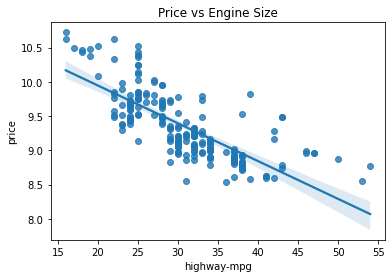

In [137]:
sns.regplot(x="highway-mpg",y="price",data=data)
#plt.ylim(0,)
plt.title("Price vs Engine Size")
plt.show()# +ve linear relationship- strong

In [138]:
qq=np.cov(data['engine-size'],data['price'])

In [139]:
qq

array([[6.60325687e-06, 1.02226229e-03],
       [1.02226229e-03, 2.47678503e-01]])

In [140]:
qq=np.cov(dds['highway-mpg'],data['price'])

In [141]:
qq

array([[47.423099  , -2.61768755],
       [-2.61768755,  0.2476785 ]])

In [142]:
x=data[['engine-size','curb-weight','horsepower']]
Y=data['price']

import statsmodels.api as sm
X = sm.add_constant(x) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     283.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           5.64e-72
Time:                        19:03:51   Log-Likelihood:                 22.362
No. Observations:                 205   AIC:                            -36.72
Df Residuals:                     201   BIC:                            -23.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.9681      1.670     -1.778      

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [143]:
data=data[['price','horsepower','curb-weight','engine-size']]

In [144]:
i=data.iloc[:,0]
o=data.iloc[:,1:4]

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(i,o, test_size=0.2, random_state=0)

In [146]:
lm = LinearRegression() # creating regression variable
Z = data[['curb-weight',"horsepower","engine-size"]] # extracting independent variables

#Fit the linear model using the four above-mentioned variables.
lm.fit(Z, data['price'])
print("What is the value of the intercept (a)? \n {}".format(lm.intercept_))
print("What are the values of the coefficients (b1)? \n {}".format(lm.coef_))
print("\n Final estimated linear model")
print(f"\n Price = {lm.intercept_} + {lm.coef_[0]}*engine-size")

What is the value of the intercept (a)? 
 -2.968101182963812
What are the values of the coefficients (b1)? 
 [5.71679157e-04 6.69265245e+00 9.26566463e+00]

 Final estimated linear model

 Price = -2.968101182963812 + 0.0005716791567197363*engine-size


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

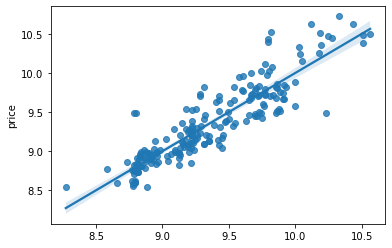

In [147]:
sns.regplot(reg.predict(Z),data['price'],fit_reg=True,label="Regression")

In [148]:
#import mse
from sklearn.metrics import mean_squared_error
a=mean_squared_error(data['price'],reg.predict(Z))
a

0.04707345719799062

In [149]:
print(r2_score(data['price'],reg.predict(Z)))

0.809009627567881


In [150]:
data=data[['price','horsepower','curb-weight','engine-size']]

In [151]:
data.dtypes

price          float64
horsepower     float64
curb-weight    float64
engine-size    float64
dtype: object

In [152]:
X=data.iloc[:,0]
Y=data.iloc[:,1:2]

In [153]:
# Apply multiple Linear Regression Model
lreg = LinearRegression(normalize=True, fit_intercept=True)
lreg.fit(X_train, y_train)
 
# Generate Prediction on test set
lreg_y_pred = lreg.predict(X_test)
 
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test) ** 2)
print("Mean squared Error on test set : ", mean_squared_error(lreg_y_pred, y_test))
print("r2_score on test set : ", r2_score(lreg_y_pred, y_test))

ValueError: Expected 2D array, got 1D array instead:
array=[ 9.76709493 10.43951298  9.6184686   9.32892309  8.93708704  8.93708704
  9.60703379  9.36683117  9.04723303 10.08058717  8.86770921  8.99442067
  9.26813747  9.71129746  9.82005159  9.28683834  9.82119231  9.20633235
  8.73697109  8.77632146  9.64924026  9.23941362  9.04723303  9.37966112
  9.51037089  9.01054707  8.74751095  9.08000387  8.98707181  8.90855938
  8.98657163  8.71522404  8.86120834  8.87150535  9.7350689   8.92252496
  9.38429368  8.91771276  9.53676227  9.71462465 10.10907794  9.0546218
  9.48797211  9.01127949 10.38985654  9.3100047   9.4951433   9.73180916
  9.13324332  9.23454506  9.71111566  9.08760761  9.09616333  9.45438399
  8.82246957  9.70686421  9.42867237 10.62035126  9.67940606  8.95866874
  8.58447794  9.01784726  9.54323479  8.90231953  8.62550933  8.95389854
  9.84955921  8.5554519   9.51007453  8.89549263  9.79534539  8.9617508
  9.32767886  9.1305393   9.46846489 10.24622583 10.49127422 10.47869544
  8.85209276  9.9751103   9.95726526  8.84188199  8.98180732  9.20833837
  9.83199155  8.79102986 10.33397042  8.8052252   9.16419172  9.1630391
 10.01993637  9.78188473 10.24877794  9.58114502  8.80866806  8.88155849
  9.15852062  8.97436484  8.80222175  9.29633457  9.7365471   8.98180732
  9.57491404  8.89494446  9.52112843  9.81356285  9.71111566  8.73697109
  9.01651287  9.24425859  9.88832315  9.38008315  9.32794561 10.51542468
  9.11548009  9.40672919  8.80911626  8.96033937 10.51942966  8.87192625
  9.09616333  9.74537068  8.75431854  8.83273359  9.17357265 10.43493899
  9.66077885  8.59396903  9.04180337  8.95866874 10.02681077  9.2299469
  9.46993156  9.09929707  9.44375104  9.20913965  8.94754602  9.71896357
  8.9888205   9.71202434 10.46470206  8.7305288   8.80866806  9.1375546
  9.04770379  9.85455988  9.27781209  9.46807857  9.08760761  9.65790666
  8.93629819  9.13550906 10.3609124   9.13550906  8.89494446  8.62550933
  9.48850227  9.51037089  9.50412876 10.14847087  9.53567944  9.80642584
 10.38127332  9.77956697].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#apply LinearRegression with gradient descent
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
# define models and parameters
model = LinearRegression()
solvers = ['lbfgs', 'sag', 'saga', 'newton-cg', 'trust-ncg']
penalty = ['l2']
#c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty)#,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous-multioutput' instead.

In [ ]:
#types of cv
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate

In [ ]:
#covrt 1d arary to 2d array
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [ ]:
print(X_train.shape)
print(X_test.shape)


(164, 1)
(41, 1)


In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
#Test Evaluation 
#X_train,X_test,y_train,y_test
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred)) #Coefficient of Determination
print(mean_squared_error(y_test, y_pred))

0.5884697655155401
26900.45801682894


In [ ]:

print("Train data shape of X = % s and Y = % s : "%(X_train.shape, y_train.shape))
 
print("Test data shape of X = % s and Y = % s : "%(X_test.shape, y_test.shape))

Train data shape of X = (164, 1) and Y = (164, 3) : 
Test data shape of X = (41, 1) and Y = (41, 3) : 


In [ ]:
# Apply multiple Linear Regression Model
lreg = LinearRegression( normalize=True, fit_intercept=True)
lreg.fit(X_train, y_train)
 
# Generate Prediction on test set
lreg_y_pred = lreg.predict(X_test)
 
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test) ** 2)
print("Mean squared Error on test set : ", mean_squared_error(lreg_y_pred, y_test))
print("r2_score on test set : ", r2_score(lreg_y_pred, y_test))
 
# Putting together the coefficient and their corresponding variable names
#lreg_coefficient = pd.DataFrame()
#lreg_coefficient["Columns"] = X_train.columns
#lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
#print(lreg_coefficient)

TypeError: 'Series' object is not callable

In [ ]:
#covert into 2D array
X_train=np.array(X_train).reshape()
X_test=np.array(X_test).reshape()


ValueError: cannot reshape array of size 164 into shape (1,2)

In [ ]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

DTR Regressionn


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


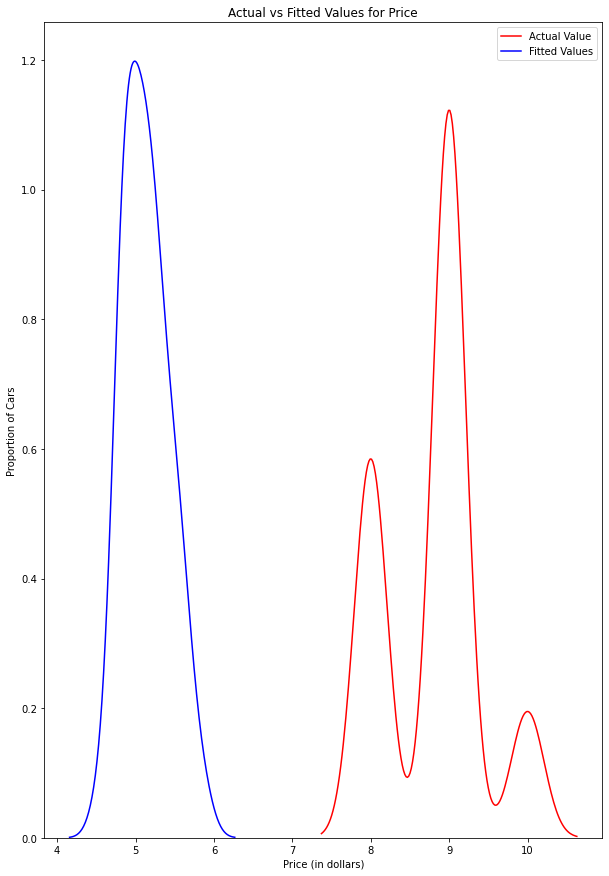

In [ ]:
print('DTR Regressionn')

# plot
plt.figure(figsize=(10,15))


ax1 = sns.distplot(o, hist=False, color="r")
sns.distplot(y_pred, hist=False, color="b", ax=ax1)

plt.legend(["Actual Value","Fitted Values"])
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
#Test Evaluation 
#X_train,X_test,y_train,y_test
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred)) #Coefficient of Determination
print(mean_squared_error(y_test, y_pred)) #M

In [ ]:
#import vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
pd.DataFrame({'variables':X.columns[1:], 'VIF':[variance_inflation_factor(X.values, i+1)
for i in range(len(X.columns[1:]))]})

,variables,VIF
0,horsepower,250.706177
1,engine-size,507.763154


In [ ]:
#match thecoff value of both up and down regression model to deside parameter  for the model

In [ ]:
x=data[['engine-size','curb-weight','horsepower']]
Y=data['price']

import statsmodels.api as sm
X = sm.add_constant(x) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     283.8
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           5.64e-72
Time:                        10:47:52   Log-Likelihood:                 22.362
No. Observations:                 205   AIC:                            -36.72
Df Residuals:                     201   BIC:                            -23.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.9681      1.670     -1.778      

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# convert data columns to dataframe
data_df = pd.DataFrame(data=data, columns=['curb-weight', 'horsepower', 'engine-size','price']).astype(int)
i=data_df.iloc[:,:3]
o=data_df.iloc[:,3]

In [ ]:
DTR=DecisionTreeRegressor()
X_train,X_test,y_train,y_test=train_test_split(i,o,test_size=0.2,random_state=0)
# reshape the data
DTR= DecisionTreeRegressor(max_depth = 20,max_features=3)
DTR.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=20, max_features=3)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(i.shape)
print(o.shape)


(164, 3)
(41, 3)
(164,)
(41,)
(205, 3)
(205,)


In [ ]:
y_pred=DTR.predict(X_test)

DTR Regressionn


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


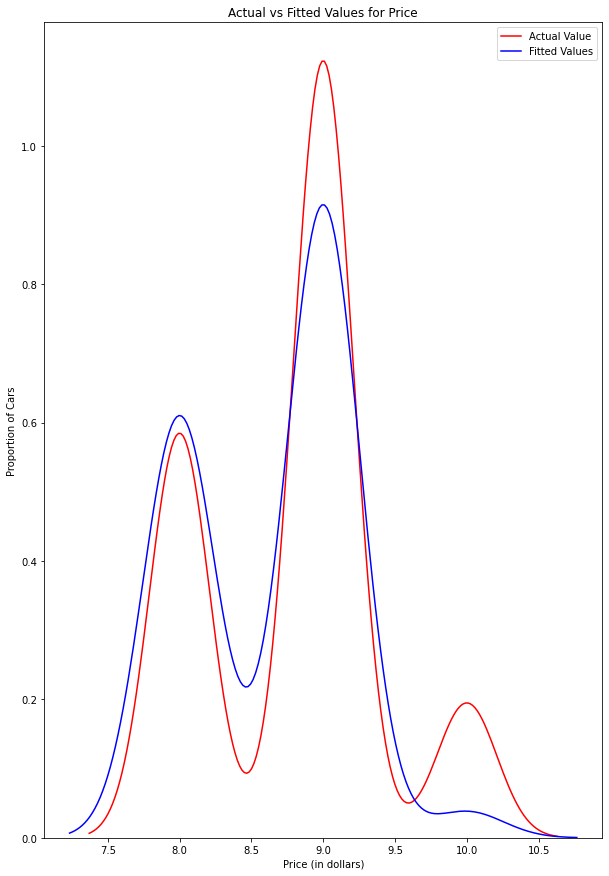

In [ ]:

print('DTR Regressionn')

# plot
plt.figure(figsize=(10,15))


ax1 = sns.distplot(o, hist=False, color="r")
sns.distplot(y_pred, hist=False, color="b", ax=ax1)

plt.legend(["Actual Value","Fitted Values"])
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
pearson_coef, p_value = stats.pearsonr(data['curb-weight'],data['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.8762307078938066  with a P-value of P =  2.774365563059079e-66


In [ ]:
#X_train,X_test,y_train,y_test
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(X_train, X_train)) #Coefficient of Determination
print(mean_squared_error(X_train, X_train)) #MSE (yA-yp)2/n

1.0
0.0


In [ ]:
#Test Evaluation 
#X_train,X_test,y_train,y_test
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred)) #Coefficient of Determination
print(mean_squared_error(y_test, y_pred)) #M

0.5020242914979758
0.14634146341463414


In [ ]:
#Random forest
X_train,X_test,y_train,y_test=train_test_split(i,o,test_size=0.2,random_state=0)

In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(i, o)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.849048 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.840714 (0.061640) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.840635 (0.061999) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.815000 (0.065630) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.840714 (0.061640) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.839048 (0.059163) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.794127 (0.054699) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.840714 (0.061640) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.839206 (0.059070) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.766349 (0.069928) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.840714 (0.061640) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.844048 (0.056560) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.592143 (0.019606) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.840714 (0.061640) with: 


Penalized logistic regression imposes a penalty to the logistic model for having too many variables. This results in shrinking the coefficients of the less contributive variables toward zero. This is also known as regularization.

In [ ]:
X_train=pd.DataFrame(X_train)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
X_test=pd.DataFrame(X_test)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))


Accuracy :  0.6341463414634146


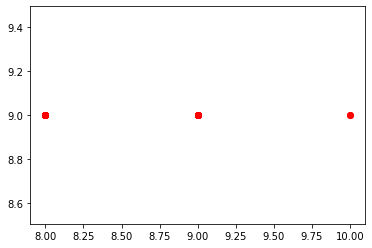

In [ ]:
plt.plot(y_test,y_pred, 'ro')


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm)

from sklearn.preprocessing import PolynomialFeatures
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
poly.fit_transform(X_train,y_train)
y_pred=poly.predict(X_test)

In [ ]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_train,y_train)
print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powersn",poly.powers_)

Input 3
Ouput 5456
Powersn [[ 0  0  0]
 [ 1  0  0]
 [ 0  1  0]
 ...
 [ 0  2 28]
 [ 0  1 29]
 [ 0  0 30]]


In [ ]:
i=data_df.iloc[:,2]
o=data_df.iloc[:,3]


In [ ]:

X_train,X_test,y_train,y_test=train_test_split(i,o,test_size=0.2,random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(i.shape)
print(o.shape)

(164,)
(41,)
(164,)
(41,)
(205,)
(205,)


In [ ]:
#covrt 1d arary to 2d array
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)



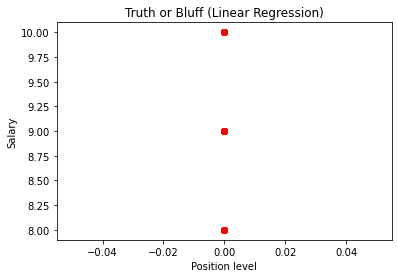

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X = X_poly, y = y_train)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_test, pol_reg.predict(poly_reg.fit_transform(X_test)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [ ]:
#model is overfitting the data because the model is not able to capture the variation in the data.
#what we cando if model is overfitted
#1. increase the number of features
#2. increase the number of trees
#3. increase the depth of the tree
#4. increase the number of estimators


In [ ]:
# if model overfitted in Dt we can ply Random forest


In [ ]:
#Random forest
X_train,X_test,y_train,y_test=train_test_split(i,o,test_size=0.2,random_state=0)
# reshape the data
RFR= RandomForestRegressor(n_estimators=5,max_depth=2,max_features=3,max_leaf_nodes=3,criterion='mse')
RFR.fit(X_train,y_train)



RandomForestRegressor(max_depth=2, max_features=3, max_leaf_nodes=3,
                      n_estimators=5)

In [ ]:
y_pred=RFR.predict(X_test)

RFR Regressionn


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


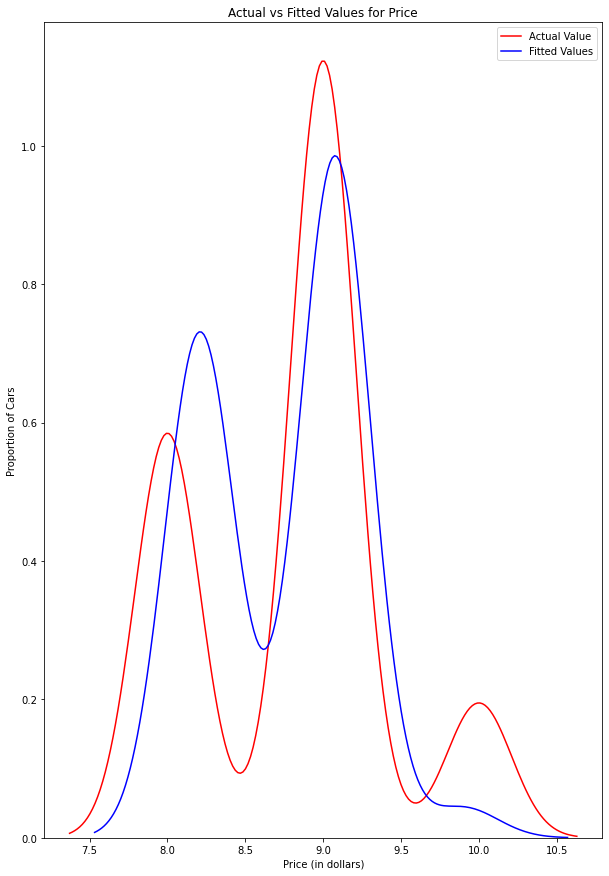

In [ ]:

print('RFR Regressionn')

# plot
plt.figure(figsize=(10,15))


ax1 = sns.distplot(o, hist=False, color="r")
sns.distplot(y_pred, hist=False, color="b", ax=ax1)

plt.legend(["Actual Value","Fitted Values"])
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<AxesSubplot:xlabel='price', ylabel='Count'>

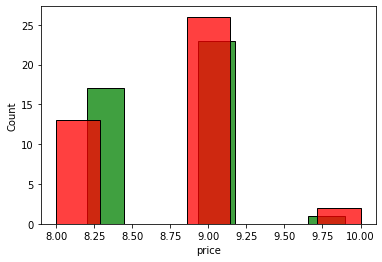

In [ ]:
sns.histplot(y_pred,color='green')
sns.histplot(y_test,color='red')

<AxesSubplot:xlabel='price'>

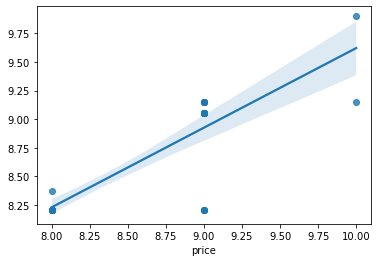

In [ ]:
sns.regplot(x = y_test, y = y_pred, data = RFR)

In [ ]:
#X_train,X_test,y_train,y_test
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(X_train, X_train)) #Coefficient of Determination
print(mean_squared_error(X_train, X_train)) #MSE (yA-yp)2/n

1.0
0.0


In [ ]:
#Test Evaluation 
#X_train,X_test,y_train,y_test
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred)) #Coefficient of Determination
print(mean_squared_error(y_test, y_pred)) #M

0.6623278024782855
0.09923263865302023


In [ ]:
#apply cross validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RFR, X_train, y_train, cv=2)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


[0.6540449  0.63562516]
Accuracy: 0.64 (+/- 0.02)


In [ ]:
# applly svm algorithum
from sklearn.svm import SVR
SR= SVR(kernel='rbf',C=1,gamma=0.1)
SR.fit(X_train,y_train)

SVR(C=1, gamma=0.1)

In [ ]:
#parameter for svr
#kernel: linear, poly, rbf, sigmoid
#degree: for poly
#C: for SVR
#epsilon: for SVR
#gamma: for rbf


#how to turn paramter for svr
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html



In [ ]:
y_pred=SR.predict(X_test)

SR Regressionn


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


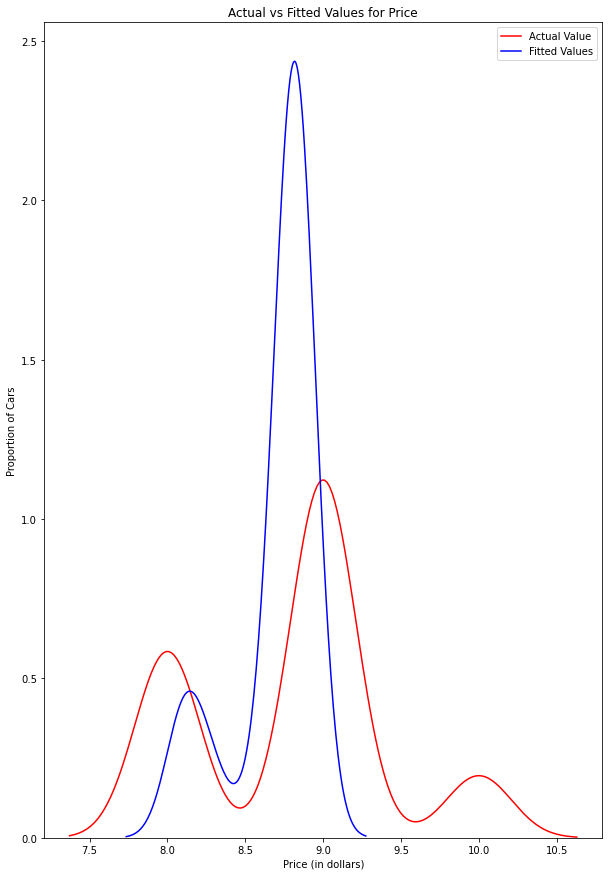

In [ ]:

print('SR Regressionn')

# plot
plt.figure(figsize=(10,15))


ax1 = sns.distplot(o, hist=False, color="r")
sns.distplot(y_pred, hist=False, color="b", ax=ax1)

plt.legend(["Actual Value","Fitted Values"])
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
#X_train,X_test,y_train,y_test
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(X_train, X_train)) #Coefficient of Determination
print(mean_squared_error(X_train, X_train)) #MSE (yA-yp)2/n

1.0
0.0


In [ ]:
#Test Evaluation 
#X_train,X_test,y_train,y_test
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred)) #Coefficient of Determination
print(mean_squared_error(y_test, y_pred)) #M

0.09941370896399304
0.26465772026876117


In [ ]:
# apply naive bayes
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
#import train_test_split
i=data_df.iloc[:,:3]
o=data_df.iloc[:,3]
from sklearn.model_selection import train_test_split
GNB= GaussianNB()
X_train,X_test,y_train,y_test=train_test_split(i,o,test_size=0.2,random_state=0)
GNB.fit(X_train,y_train)


GaussianNB()

In [ ]:
y_pred=GNB.predict(X_test)

GNB Regressionn


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


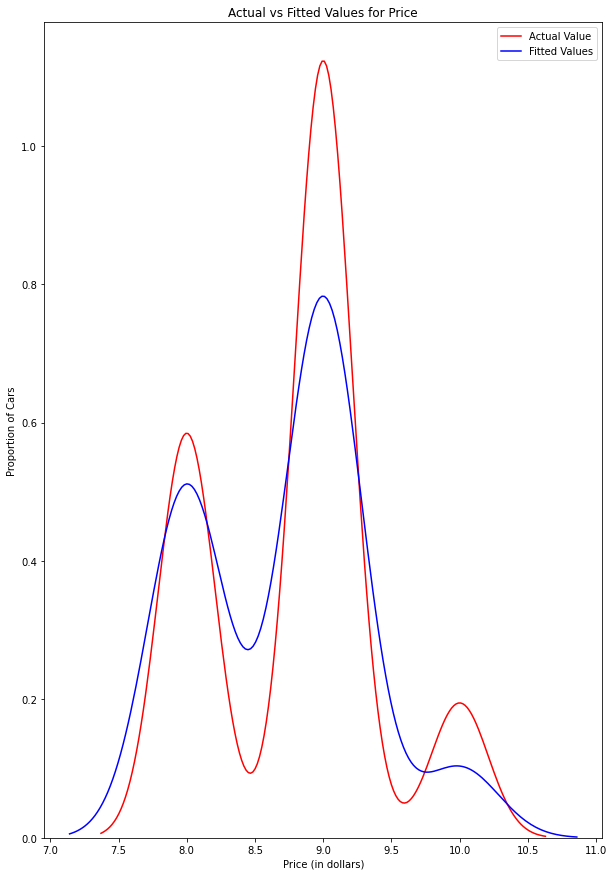

In [ ]:
print('GNB Regressionn')

# plot
plt.figure(figsize=(10,15))


ax1 = sns.distplot(o, hist=False, color="r")
sns.distplot(y_pred, hist=False, color="b", ax=ax1)

plt.legend(["Actual Value","Fitted Values"])
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
#X_train,X_test,y_train,y_test
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(X_train, X_train)) #Coefficient of Determination
print(mean_squared_error(X_train, X_train)) #MSE (yA-yp)2/n

1.0
0.0


In [ ]:
#Test Evaluation 
#X_train,X_test,y_train,y_test
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred)) #Coefficient of Determination
print(mean_squared_error(y_test, y_pred)) #M

0.4190283400809718
0.17073170731707318


###'''import pandas as pd
from sklearn import linear_model
import tkinter as tk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

X = df[['Interest_Rate','Unemployment_Rate']].astype(float) # here we have 2 input variables for multiple regression.
#If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively,
# # you may add additional variables within the brackets
Y = df['Stock_Index_Price'].astype(float) # output variable (what we are trying to predict)

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Type Interest Rate: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text=' Type Unemployment Rate: ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)

def values(): 
    global New_Interest_Rate #our 1st input variable
    New_Interest_Rate = float(entry1.get()) 
    
    global New_Unemployment_Rate #our 2nd input variable
    New_Unemployment_Rate = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Stock Index Price: ', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Stock Index Price',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 
#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df['Interest_Rate'].astype(float),df['Stock_Index_Price'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['Stock_Index_Price']) 
ax3.set_xlabel('Interest Rate')
ax3.set_title('Interest Rate Vs. Stock Index Price')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(df['Unemployment_Rate'].astype(float),df['Stock_Index_Price'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend(['Stock_Index_Price']) 
ax4.set_xlabel('Unemployment_Rate')
ax4.set_title('Unemployment_Rate Vs. Stock Index Price')

root.mainloop()'''###